In [3]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

g = nx.Graph()
g.add_edges_from(
    [(1, 2), (1, 9), (3, 13), (4, 6),
    (5, 6), (5, 7), (5, 8), (5, 9),
    (5, 10), (5, 11), (5, 12), (10, 12),
    (10, 13), (11, 14), (12, 14),
    (12, 15), (13, 14), (13, 15),
    (13, 17), (14, 15), (15, 16)]
)

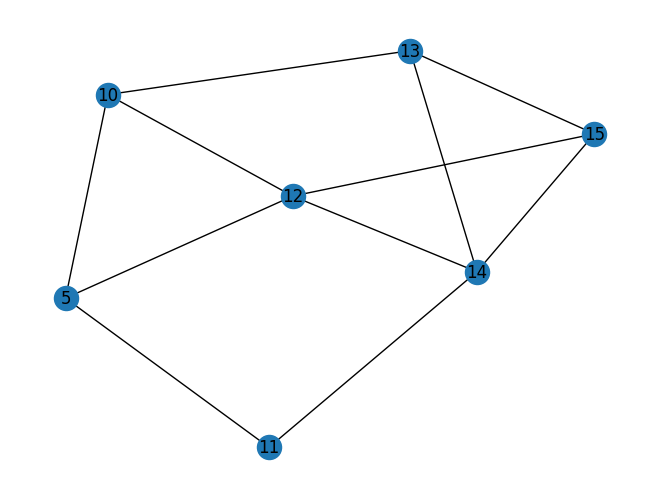

In [6]:
gg = nx.core.k_shell(g)
nx.draw(gg, with_labels=True)

In [34]:
import network_diffusion as nd
net = nd.MultilayerNetwork.load_mlx(file_path="data/aucs.mpx")
fb = net.layers["facebook"]

0 []
1 []
2 [['U134', 2], ['U112', 2], ['U49', 2]]
3 [['U65', 4], ['U42', 4]]
4 [['U21', 4], ['U113', 6], ['U59', 5], ['U69', 6], ['U6', 4]]
5 [['U107', 5], ['U10', 5], ['U1', 6], ['U106', 7], ['U29', 5]]
6 [['U123', 11], ['U32', 11], ['U124', 13], ['U71', 8], ['U109', 6], ['U18', 8], ['U47', 11], ['U54', 10], ['U76', 10], ['U79', 15], ['U142', 11], ['U4', 12], ['U91', 14], ['U110', 9], ['U67', 13], ['U130', 12], ['U3', 7]]
7 []
8 []


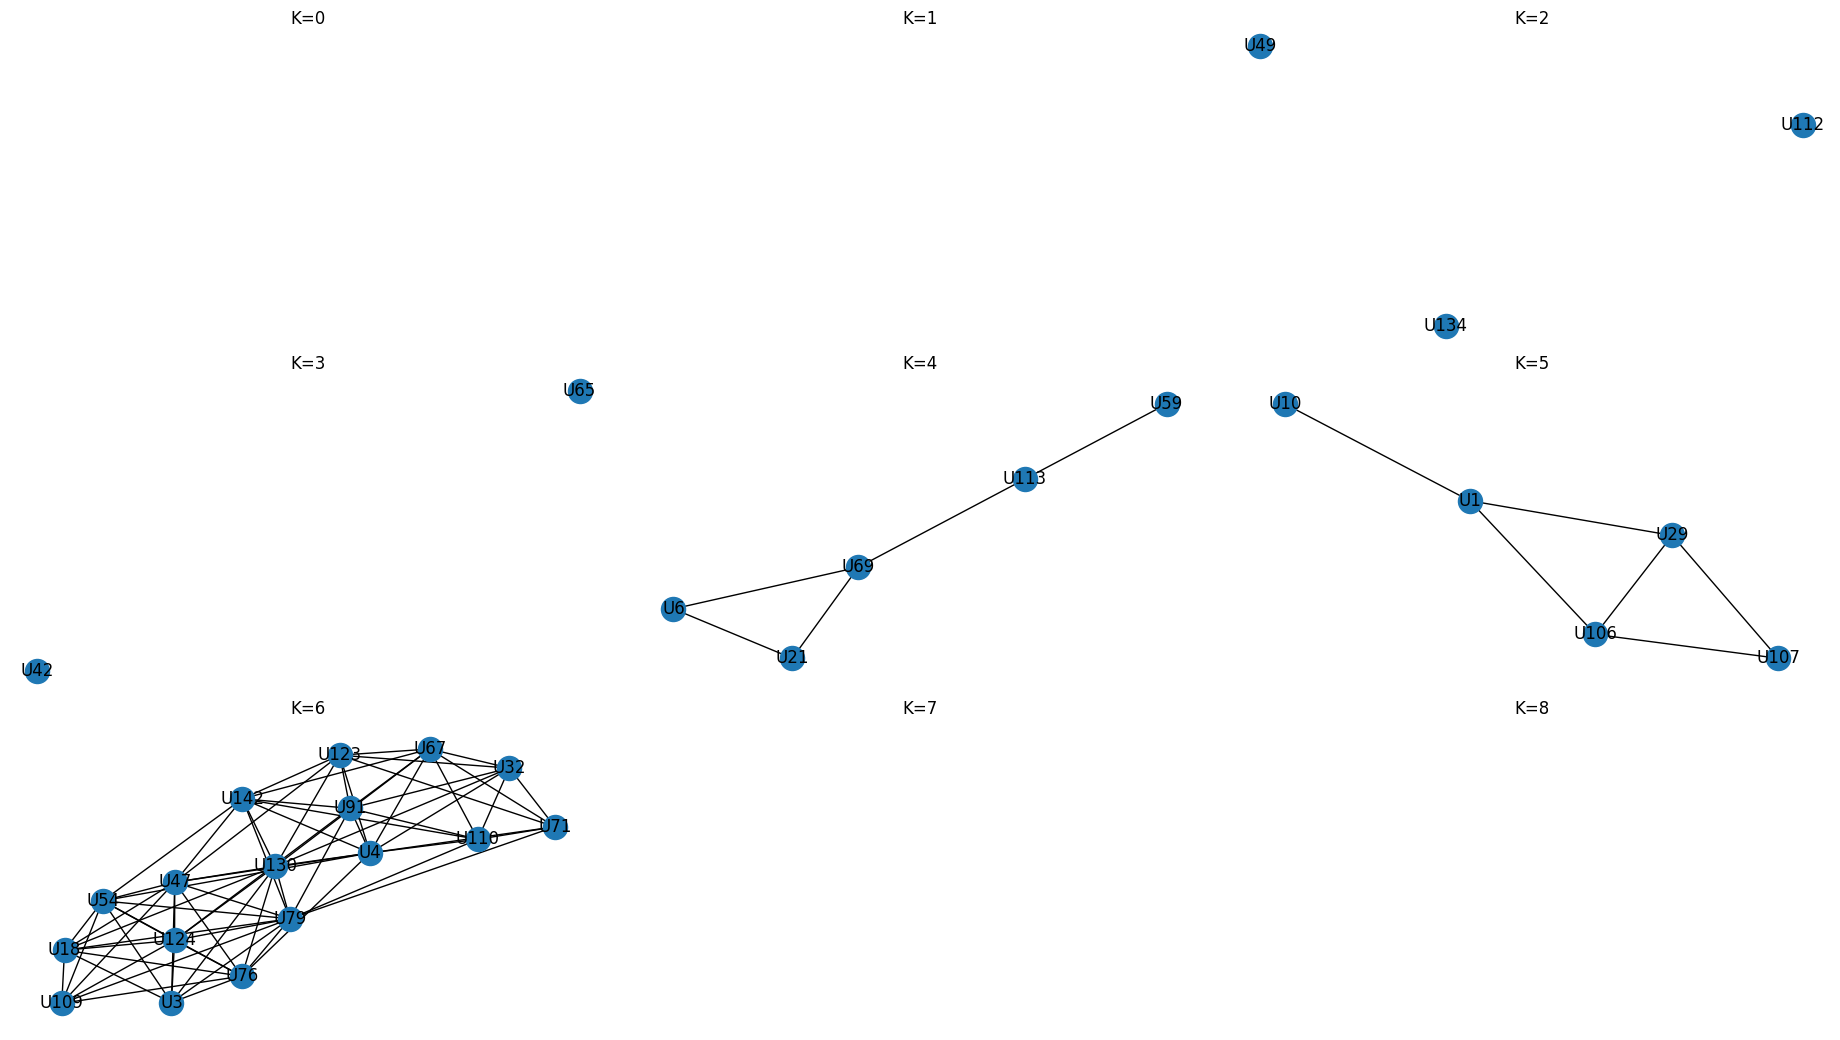

In [71]:
gg = fb.copy()
fig, axes = plt.subplots(nrows=3, ncols=3)
row = -1
col = -1

for k in range(9):

    row += 1
    if row % 3 == 0:
        row = 0
        col += 1

    axis = axes[col][row]
    axis.set_title(f"K={k}")

    ggg = nx.k_shell(gg, k=k)
    
    nx.draw(ggg, with_labels=True, ax=axis)
    print(k, [[node, nx.degree(gg, node)] for node in ggg.nodes()])

    if len(list(gg.nodes())) == 0:
        break

fig.set_size_inches(18.5, 10.5)
fig.tight_layout()

8 [['U123', 11], ['U32', 11], ['U124', 13], ['U71', 8], ['U109', 6], ['U18', 8], ['U47', 11], ['U54', 10], ['U76', 10], ['U79', 15], ['U142', 11], ['U4', 12], ['U91', 14], ['U110', 9], ['U67', 13], ['U130', 12], ['U3', 7]]


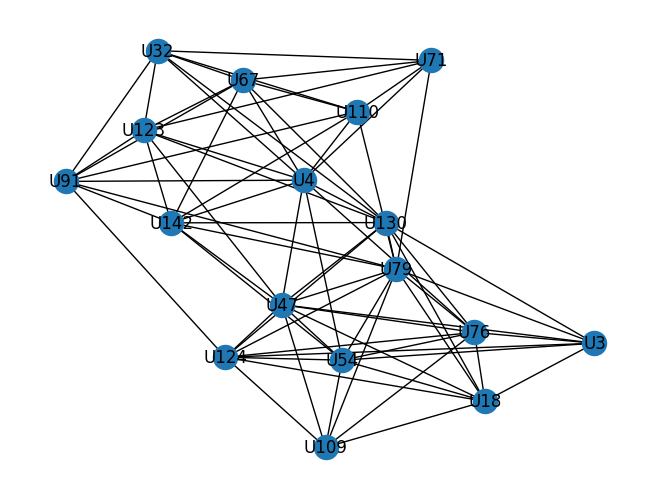

In [73]:
nx.draw(sh:=nx.k_shell(fb), with_labels=True)
print(k, [[node, nx.degree(fb, node)] for node in sh.nodes()])

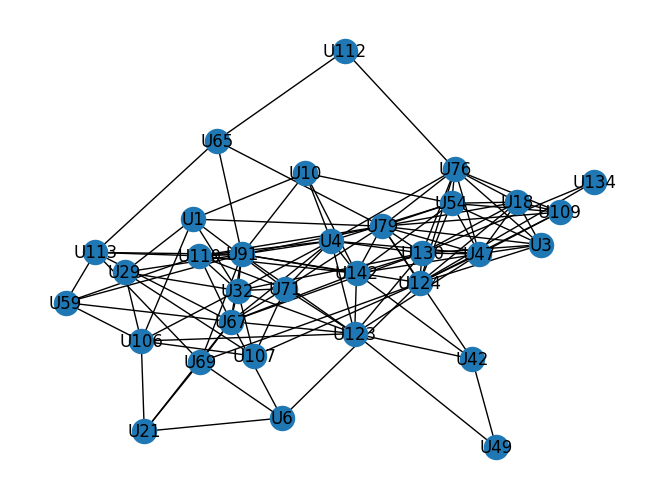

In [42]:
nx.draw(fb, with_labels=True)

In [87]:
def create_k_shell_list(g: nx.Graph):
    ksh_deepest_nodes = set(nx.k_shell(g).nodes())
    shell_ranking = {}
    k = 0

    while True:
        ksh_nodes = set(nx.k_shell(g, k=k).nodes())
        shell_ranking[k] = ksh_nodes
        if ksh_nodes == ksh_deepest_nodes:
            break
        k += 1
    
    return shell_ranking

In [88]:
rl = create_k_shell_list(fb)

In [89]:
print(sorted(rl)[::-1])

[6, 5, 4, 3, 2, 1, 0]


In [104]:
rl

{0: set(),
 1: set(),
 2: {'U112', 'U134', 'U49'},
 3: {'U42', 'U65'},
 4: {'U113', 'U21', 'U59', 'U6', 'U69'},
 5: {'U1', 'U10', 'U106', 'U107', 'U29'},
 6: {'U109',
  'U110',
  'U123',
  'U124',
  'U130',
  'U142',
  'U18',
  'U3',
  'U32',
  'U4',
  'U47',
  'U54',
  'U67',
  'U71',
  'U76',
  'U79',
  'U91'}}

In [107]:
ll = [list(rl[k]) for k in sorted(rl)[::-1]]
import itertools

In [108]:
lll = [n for cohort in sorted(rl)[::-1] for n in rl[cohort]]

In [109]:
lll

['U32',
 'U142',
 'U79',
 'U91',
 'U67',
 'U4',
 'U109',
 'U18',
 'U123',
 'U124',
 'U3',
 'U110',
 'U130',
 'U71',
 'U76',
 'U47',
 'U54',
 'U107',
 'U10',
 'U1',
 'U106',
 'U29',
 'U21',
 'U113',
 'U59',
 'U69',
 'U6',
 'U65',
 'U42',
 'U112',
 'U49',
 'U134']

### Degree centrality

In [28]:
import network_diffusion as nd
import networkx as nx

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
layer_1 = nx.Graph(
    (
        [1, 4], [2, 4], [2, 3], [3, 4], [3, 5],
        [3, 6], [4, 5], [7, 9], [8, 9], [8, 10]
    )
)

layer_2 = nx.Graph(
    (
        [1, 2], [2, 7], [2, 11], [4, 5], [4, 6],
        [5, 11], [6, 10], [7, 9], [8, 9], [8, 10],
        [10, 11]
    )
)

layer_3 = nx.Graph(
    (
        [1, 4], [2, 6], [2, 9], [3, 4], [3, 5],
        [4, 5], [5, 6], [5, 11], [6, 9], [7, 9], [10, 11]
    )
)

net = nd.MultilayerNetwork.load_layers_nx([layer_1, layer_2, layer_3], ["l1", "l2", "l3"])

In [3]:
print(net.get_actors_num())
for actor in net.get_actors():
    print(actor)

11
actor id: 1, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 4, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 2, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 3, layers and states: {'l1': None, 'l3': None}
actor id: 5, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 6, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 7, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 9, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 8, layers and states: {'l1': None, 'l2': None}
actor id: 10, layers and states: {'l1': None, 'l2': None, 'l3': None}
actor id: 11, layers and states: {'l2': None, 'l3': None}


In [38]:
selector = nd.seeding.PageRankSeedSelector()
ranking = selector(net, actorwise=True)
print([r.actor_id for r in ranking])

[4, 2, 5, 3, 11, 9, 10, 8, 7, 6, 1]


In [18]:
nx.pagerank(net.layers["l1"])

{1: 0.05003788802075308,
 4: 0.1648863359377408,
 2: 0.08507577604150617,
 3: 0.1648863359377408,
 5: 0.08507577604150617,
 6: 0.05003788802075308,
 7: 0.07017543858120512,
 9: 0.12982456141879492,
 8: 0.12982456141879492,
 10: 0.07017543858120512}

In [49]:
my_dict = { 'num6': 6, "34": 2, 'num2': 2, 'num4': 4, 'num1': 1, 'num5': 5}
sortedDict = sorted(my_dict.values())

In [50]:
sortedDict

[1, 2, 2, 4, 5, 6]

In [ ]:
[3, 2, 5, 4, 11, 10, 6, 7, 9, 8, 1]